# <font color='blue'>Machine Learning - Modelo de Classificacao</font>



### Usando SVM (Suporte Vector Machine)  Para Prever a Intenção de Compra de Usuários de E-Commerce

### Definição do Problema de Negócio:

Nosso trabalho será avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

Utilizaremos um modelo de classificação
Pelo que ele faz durante o tempo no site se ele vai comprar ou não

Online Shoppers Purchasing Intention Dataset

Link do dataset -> https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em valores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe, ou seja, nossa variável ALVO

## Importando os pacotes a serem utilizados

In [74]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

### Base e Dicionário de Dados

In [1]:
# Carregando os dados
import pandas as pd
base = pd.read_csv('online_shoppers_intention.csv')
base.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

## Análise Exploratória

In [6]:
# Shape dos dados
base.shape

(12316, 18)

In [77]:
# Tipos de Dados
base.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [78]:
# Verificando valores missing
base.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [2]:
# Removendo as linhas com valores missing
# "inplace = True" Já a tribui automenticamente vc n precisa passar "base = base.dropna()"
base.dropna(inplace = True)

In [80]:
# Verificando valores missing
base.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [81]:
# Shape
base.shape

(12316, 18)

In [82]:
# Selecionar apenas as colunas que não têm o tipo "object"
# temos 16 colunas numéricas
base.select_dtypes(exclude=['object'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False


In [83]:
# Verificando Valores Únicos
base.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

## Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

### Colunas Contínuas

1. **Definição**:
   - Representam dados que podem assumir qualquer valor dentro de um intervalo contínuo.
   - Exemplos: Altura, peso, tempo, temperatura, renda, etc.

2. **Tipos de Dados**:
   - Geralmente são do tipo numérico (inteiro ou flutuante).

3. **Operações**:
   - Permitem operações matemáticas como adição, subtração, multiplicação e divisão.
   - É possível calcular média, mediana, variância, desvio padrão, etc.

4. **Visualização**:
   - Comumente visualizadas usando gráficos como histogramas, gráficos de dispersão, boxplots, etc.

### Colunas Categóricas

1. **Definição**:
   - Representam dados que podem assumir um número limitado de categorias ou grupos distintos.
   - Exemplos: Gênero, cor, tipo de produto, status de pagamento, etc.

2. **Tipos de Dados**:
   - Geralmente são do tipo "object" ou "category" no pandas.

3. **Operações**:
   - Não permitem operações matemáticas significativas.
   - Análise estatística envolve contagem, frequência relativa, moda, etc.

4. **Visualização**:
   - Comumente visualizadas usando gráficos de barras, gráficos de setores (pizza), etc.

In [84]:
# Preparando os dados para o plot

# Cria uma cópia do dataset original
base2 = base.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for i in base2.columns:
    if base2.nunique()[i] >= 30:
        continuous.append(i)
    else:
        categorical.append(i)

In [85]:
# Mais de 30 valores unicos 
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [86]:
# Menos 30 valores unicos 
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [87]:
# Variáveis contínuas
base2[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [88]:
# Variáveis categóricas
base2[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Gráficos para colunas contínuas.

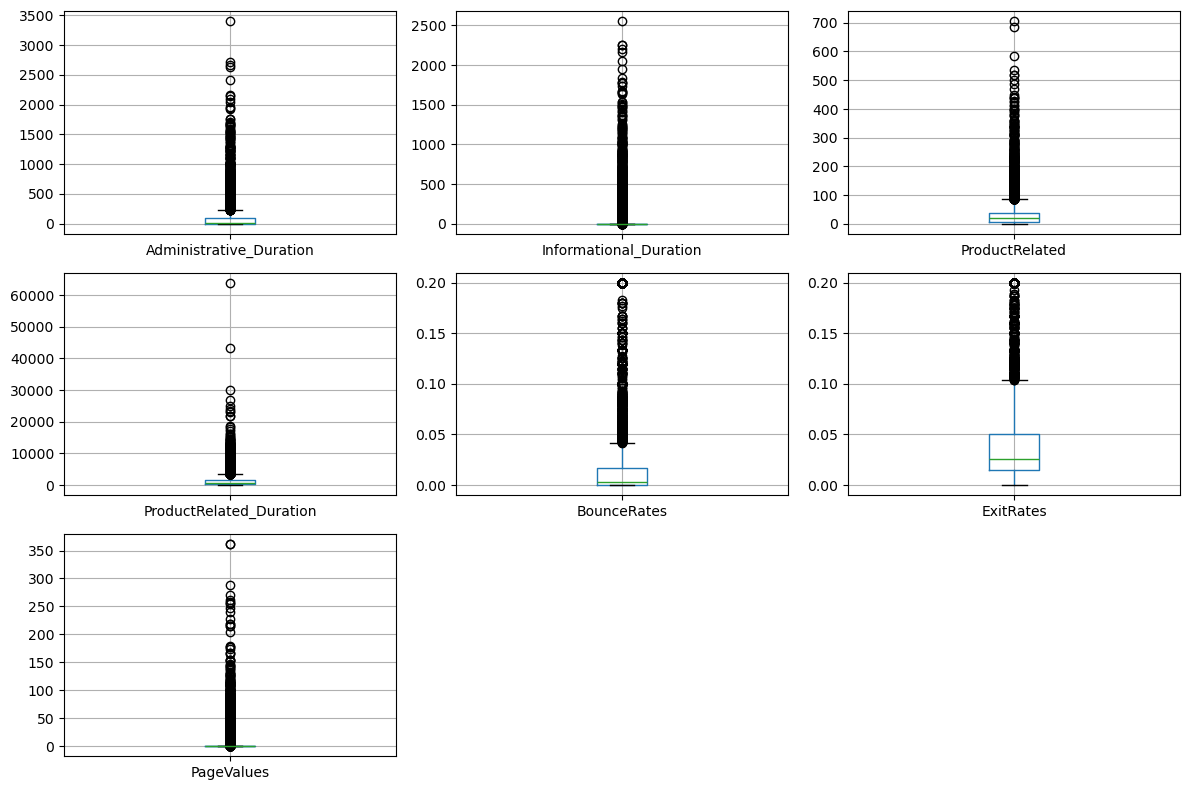

In [89]:
import matplotlib.pyplot as plt
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    base2.boxplot(col);
    plt.tight_layout()
     

### Observe que Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar transformação de log (logaritmo) para melhor tratamento e visualização desses dados.

In [90]:
import numpy as np
# Transformação de log nas variáveis contínuas
base2[continuous] = np.log1p(1 + base2[continuous])

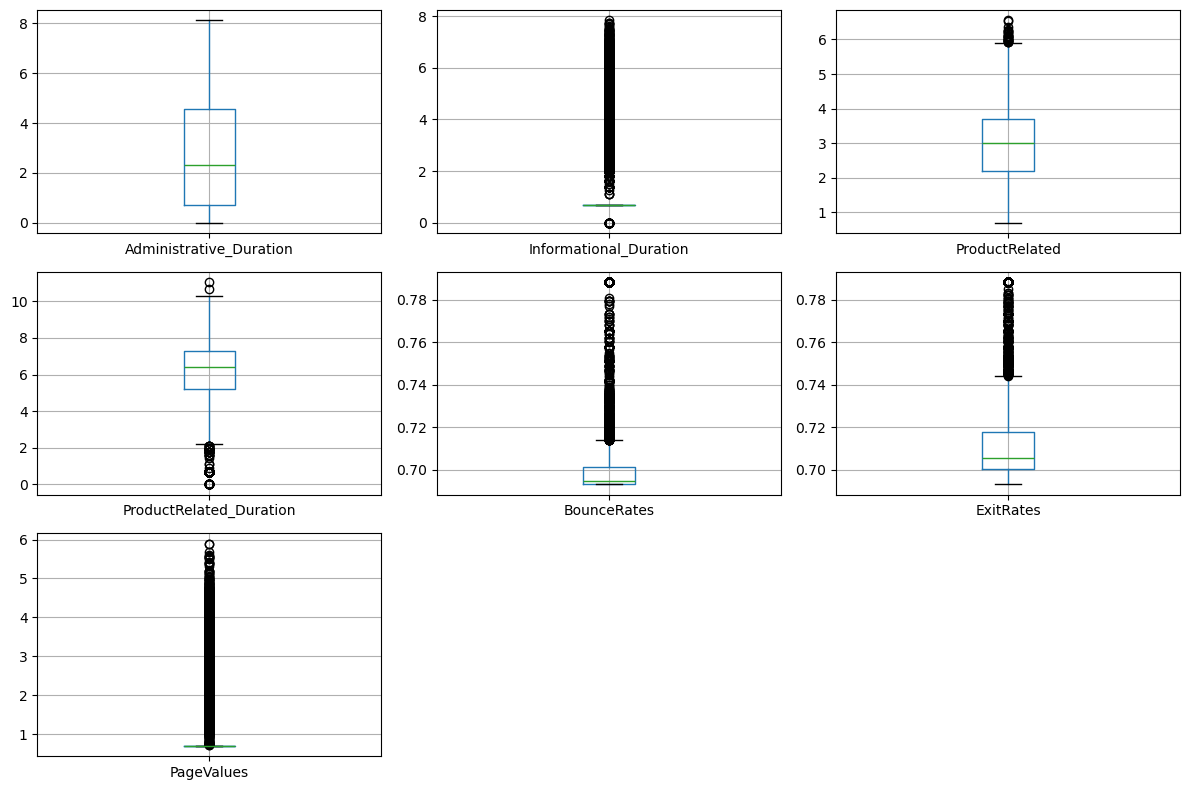

In [91]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    base2.boxplot(col);
    plt.tight_layout()

### Matriz de Correlação Entre Variáveis Contínuas.

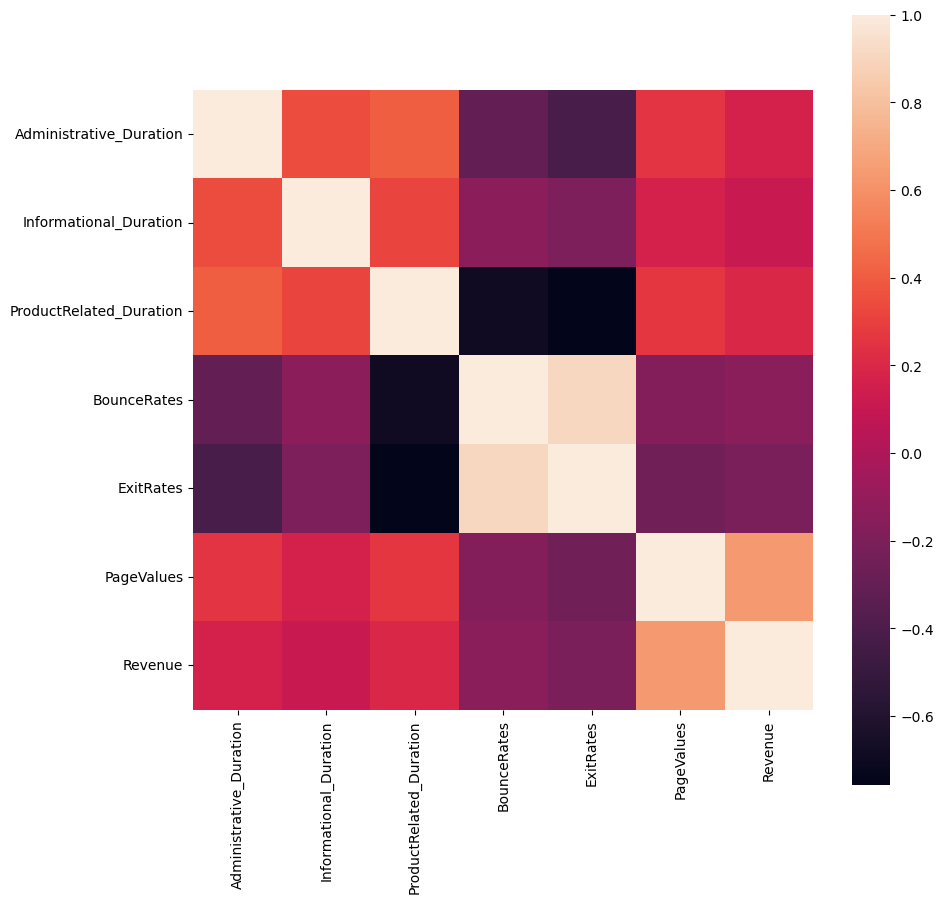

In [92]:
import seaborn as sns

# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação 
sns.heatmap(base2[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)
plt.show()

### Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas.

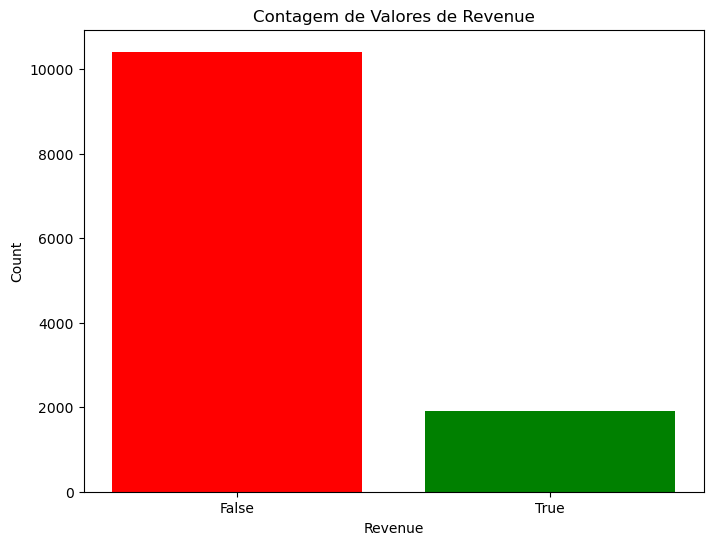

In [93]:
import matplotlib.pyplot as plt
# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(base2['Revenue'].value_counts().index, base2['Revenue'].value_counts().values, color=['red', 'green'])
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Contagem de Valores de Revenue')
plt.xticks(ticks=[False, True], labels=['False', 'True'])
plt.show()


In [94]:
base2['Revenue'].value_counts()

Revenue
False    10408
True      1908
Name: count, dtype: int64

In [95]:
base['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: count, dtype: int64

#### Analisando os tipos de visitantes

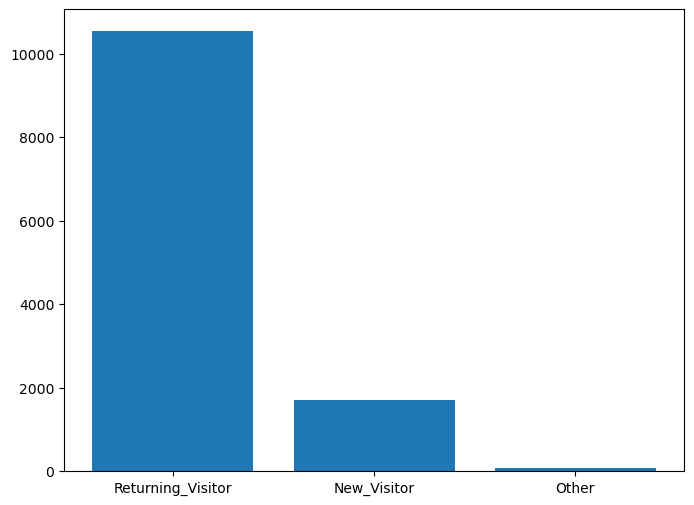

In [96]:
# Countplot Tipo de Visitante
x = base['VisitorType'].value_counts().index
y = base['VisitorType'].value_counts().values
plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.show()

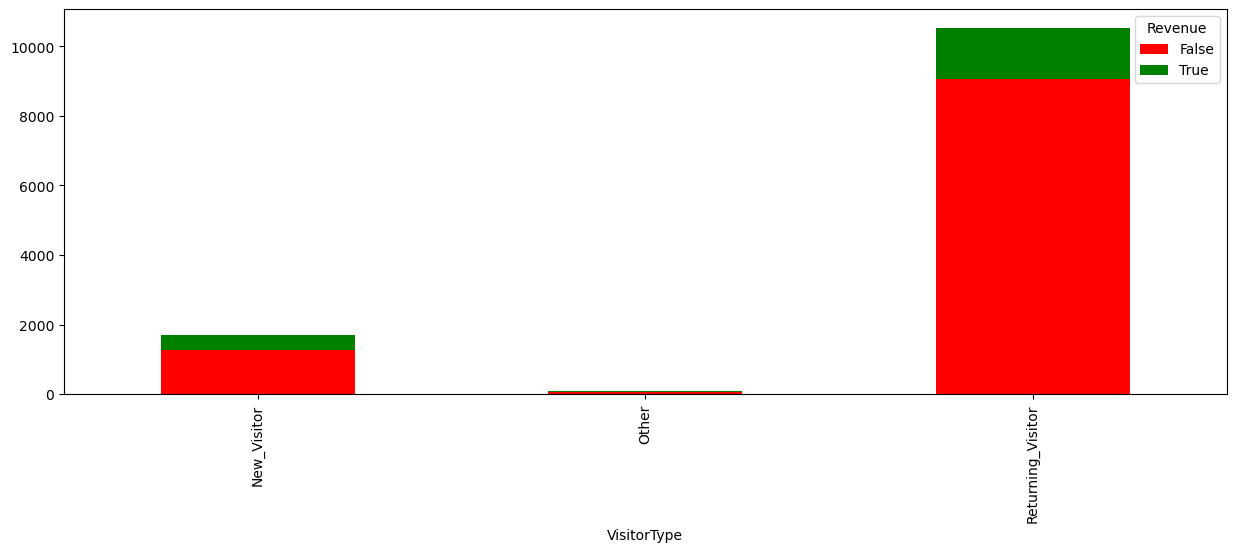

In [97]:
# Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(base2['VisitorType'], base2['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])
plt.show()

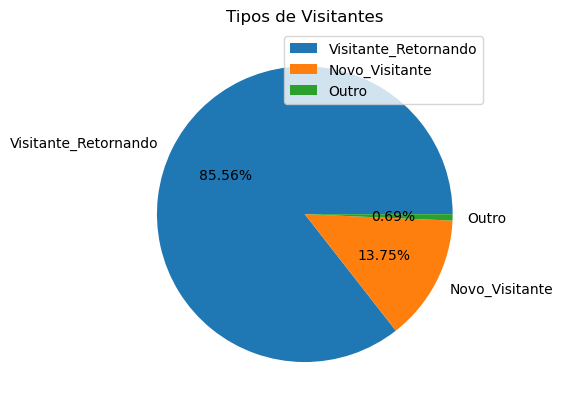

In [98]:
# Gráfico de Pizza de Tipos de Visitantes
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(base2['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

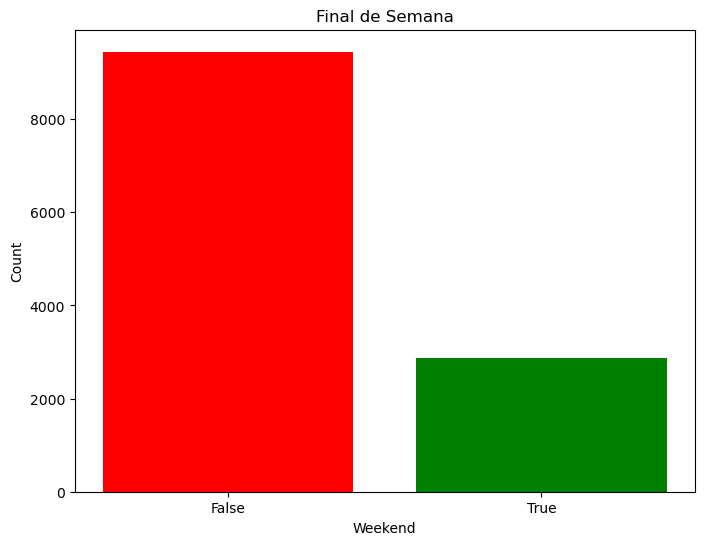

In [99]:
# Countplot Final de Semana ou Não
plt.figure(figsize=(8, 6))
plt.bar(base2['Weekend'].value_counts().index, base2['Weekend'].value_counts().values, color=['red', 'green'])
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Final de Semana')
plt.xticks(ticks=[False, True], labels=['False', 'True'])
plt.show()

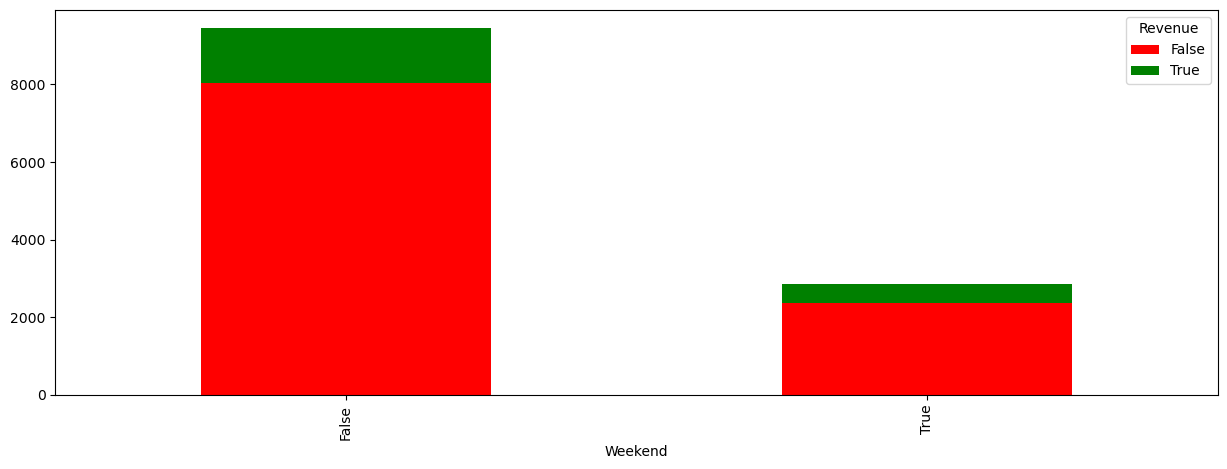

In [100]:
# Stacked Bar Final de Semana x Revenue
# Geramos mais receitas no final de semana
pd.crosstab(base2['Weekend'], base2['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (15, 5), 
                                               color = ['red', 'green'])
plt.show()

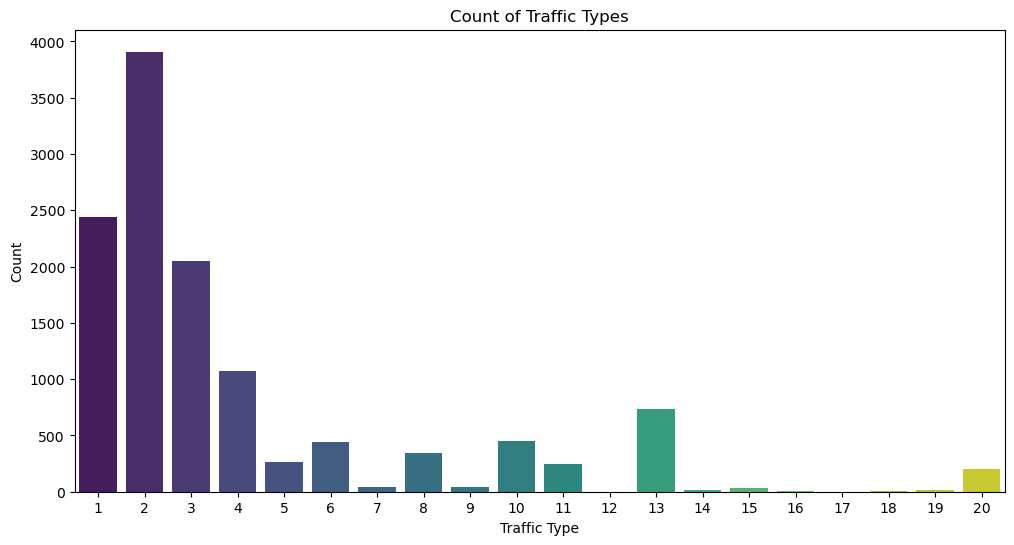

In [101]:
# Countplot Tipos de Sistemas Operacionais
import seaborn as sns

# Contando os valores
traffic_counts = base2['TrafficType'].value_counts().reset_index()
traffic_counts.columns = ['TrafficType', 'Count']


# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficType', y='Count', data=traffic_counts, palette='viridis')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.title('Count of Traffic Types')
plt.show()


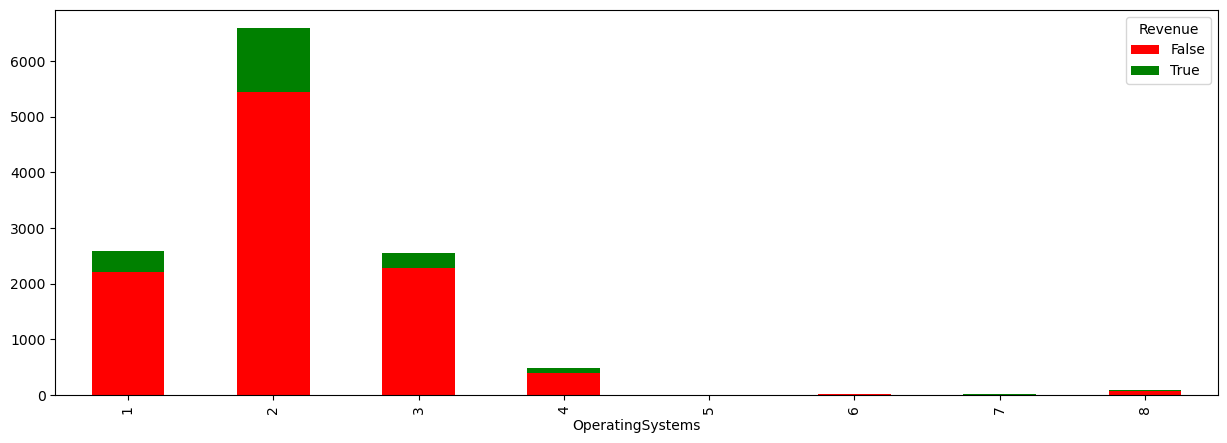

In [102]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(base2['OperatingSystems'], base2['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (15, 5), 
                                                        color = ['red', 'green'])
plt.show()

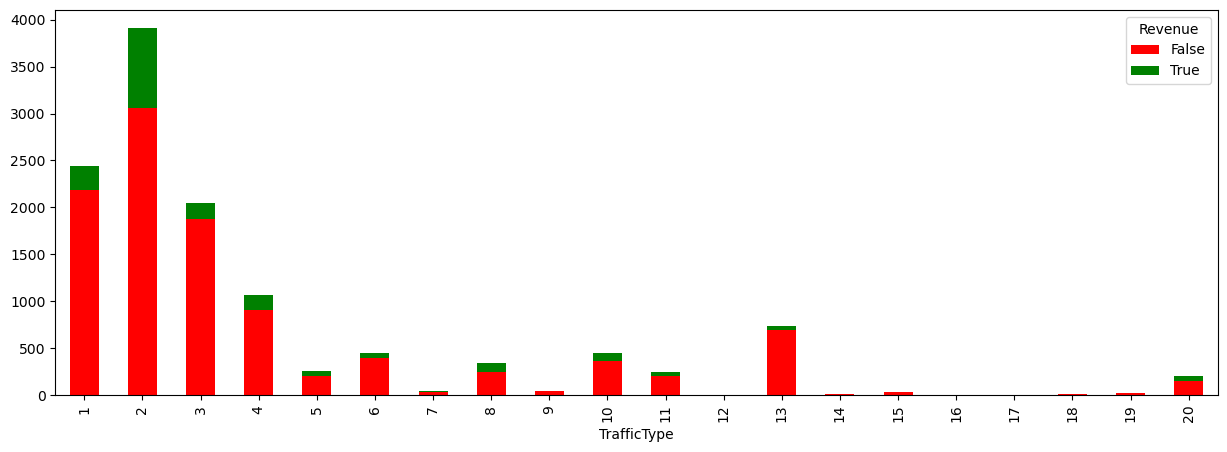

In [103]:
# Stacked Bar Tipos de Tráfego x Revenue
pd.crosstab(base2['TrafficType'], base2['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])
plt.show()

# Tratamento de dados para o ML

In [106]:
base[['Month','VisitorType']].head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [108]:
from sklearn.preprocessing import LabelEncoder
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
base['Month'] = lb.fit_transform(base['Month'])
base['VisitorType'] = lb.fit_transform(base['VisitorType'])

# Remove valores missing eventualmente gerados
base.dropna(inplace = True)

In [112]:
# Mudamos para ficar possivel ser analisado pelo ML
base[['Month','VisitorType']].head()

,Month,VisitorType
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [32]:
# Shape
base.shape

(12316, 18)

In [120]:
# Verificando se a variável resposta está balanceada
target_count = base["Revenue"].value_counts().reset_index()
target_count

,Revenue,count
0,False,10408
1,True,1908


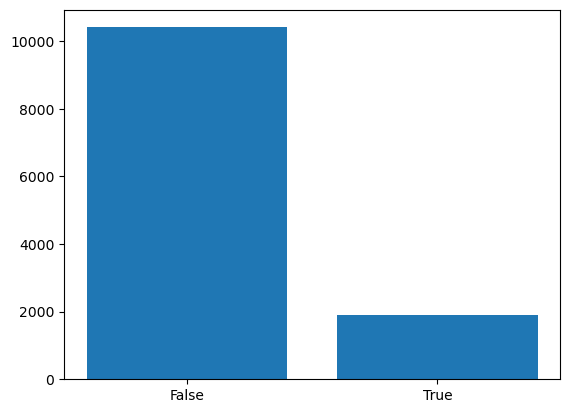

In [133]:
# Temos que balancear esse modelo
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = target_count["Revenue"].values
y = target_count["count"].values
ax.bar(x,y)

plt.xticks(ticks=[False, True], labels=['False', 'True'])
plt.show()

In [134]:
# Shape
base.shape

(12316, 18)

In [138]:
base.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,2,False,False


#### Separando x e y

In [33]:
# Variável Target
X = base.drop("Revenue", axis=1)

In [34]:
y = base["Revenue"]

In [35]:
import pandas as pd


from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score



In [36]:
# Antes do undersampling
# Temos muitas amostras
y.value_counts()

Revenue
False    10408
True      1908
Name: count, dtype: int64

In [37]:
# Aplicar undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [38]:
# Depois do under, veja a igualdade
y_resampled.value_counts()

Revenue
False    1908
True     1908
Name: count, dtype: int64

#### Separando em Treino e Teste

In [41]:
# Dividir os dados em treino e teste
# lembrar de passar os dados do "under"
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [42]:
# Pré-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#### Árvore de decisão

In [43]:
# Treinamento e avaliação com árvore de decisão
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [45]:
# Hiperparâmetros para Grid Search (Árvore de Decisão)
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['Month', 'VisitorType'], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             scoring='roc_auc')

In [47]:
# Avaliar o melhor modelo de árvore de decisão
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)
y_pred_proba_dt = best_model_dt.predict_proba(X_test)[:, 1]
print("Árvore de Decisão - Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Árvore de Decisão - ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))

Árvore de Decisão - Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.82      0.83       391
        True       0.81      0.83      0.82       373

    accuracy                           0.82       764
   macro avg       0.82      0.82      0.82       764
weighted avg       0.82      0.82      0.82       764

Árvore de Decisão - ROC AUC Score: 0.8709262700301008


#### SVM

In [49]:
# Treinamento e avaliação com SVM
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

In [51]:
# Hiperparâmetros para Grid Search (SVM)
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [1, 0.1, 0.01],
    'classifier__kernel': ['linear', 'rbf']
}
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='roc_auc')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['Month', 'VisitorType'], dtype='object'))])),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [1, 0.1, 0.01],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [52]:
# Avaliar o melhor modelo de SVM
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)
y_pred_proba_svm = best_model_svm.predict_proba(X_test)[:, 1]
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM - ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_svm))

SVM - Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.92      0.86       391
        True       0.90      0.77      0.83       373

    accuracy                           0.84       764
   macro avg       0.85      0.84      0.84       764
weighted avg       0.85      0.84      0.84       764

SVM - ROC AUC Score: 0.9172397715351439


## Conclusão, SVM se saiu melhor na maioria dos testes, ela seria uma escolha melhor aqui!